Ratings & revenues analysis by app size and app price

Purpose 
This notebook will find out how an app's size and price influence an app's rating and revenue. Will apps be more likely to get higher ratings or revenues in google play when they have certain genres? Will some genres help apps get higher ratings or revenues in apple store?

In [1]:
import math
import pandas as pd
import numpy as np

from matplotlib.pylab import plt
import seaborn as sns

from os.path import exists, isfile

Load datasets

In [2]:
if not exists("../../datasets/2300_combine_kaggle_datasets.csv"):
    print ("Missing dataset file")
    
df=pd.read_csv("../../datasets/2300_combine_kaggle_datasets.csv")
df.head()

,apple_id,trim_title,apple_title,genre,apple_rating,apple_reviews,apple_size,pegi,normed_apple_rating,google_title,...,log_google_reviews,log_apple_reviews,z_score_google_rating,z_score_apple_rating,z_score_google_sub_apple,norm_google_sub_apple,google_revenue,apple_revenue,log_google_revenue,log_apple_revenue
0,898968647,Call of Duty®,Call of Duty®: Heroes,Games,4.5,179416,201.075195,Teen,0.9,Call of Duty®: Heroes,...,6.205244,5.253861,0.449144,0.638043,-0.188899,-0.02,0.00,0.00,NaN,NaN
1,1147297267,Dont Starve,Don't Starve: Shipwrecked,Games,3.5,495,604.341797,Everyone 10+,0.7,Don't Starve: Shipwrecked,...,3.166726,2.694605,-0.143135,-0.806018,0.662884,0.12,7325.32,2470.05,3.864827,3.392706
2,352670055,F,F-Sim Space Shuttle,Games,4.5,6403,72.855469,Everyone,0.9,F-Sim Space Shuttle,...,3.734560,3.806384,0.449144,0.638043,-0.188899,-0.02,27080.73,31950.97,4.432660,4.504484
3,763692274,Grand Theft Auto,Grand Theft Auto: San Andreas,Games,4.0,32533,1964.965820,Mature 17+,0.8,Grand Theft Auto: San Andreas,...,5.542778,4.512324,0.449144,-0.083987,0.533131,0.08,2439244.38,227405.67,6.387255,5.356801
4,771989093,LEGO® Friends,LEGO® Friends,Games,4.0,400,730.941406,Everyone,0.8,LEGO® Friends,...,2.931458,2.602060,0.449144,-0.083987,0.533131,0.08,4261.46,1996.00,3.629558,3.300161


Calculate revenue

The difference between revenues can be huge.

In [3]:
df = df[['normed_apple_rating', 'apple_size', 'normed_google_rating', 'google_size', 'price', 'log_google_reviews', 'google_reviews', 'apple_reviews', 'log_apple_reviews', 'genre', 'google_revenue', 'apple_revenue']].copy()

In [4]:
#corr_df = df[['normed_apple_rating', 'apple_size', 'normed_google_rating', 'google_size', 'price', 'google_reviews', 'apple_reviews', 'google_revenue', 'apple_revenue']].corr() 
corr_df = df[['normed_apple_rating', 'apple_size', 'price', 'apple_reviews', 'apple_revenue']].corr() 
corr_df["apple_size"][['normed_apple_rating', 'apple_revenue', 'apple_reviews']].sort_values(ascending=False)

normed_apple_rating    0.067777
apple_revenue          0.005892
apple_reviews         -0.012534
Name: apple_size, dtype: float64

In [5]:
corr_df["price"][['normed_apple_rating', 'apple_revenue', 'apple_reviews']].sort_values(ascending=False)

apple_revenue          0.202515
normed_apple_rating    0.064964
apple_reviews         -0.082466
Name: price, dtype: float64

The correlation between rating, revenue and size, price.

We only analyse the relationship between related features.

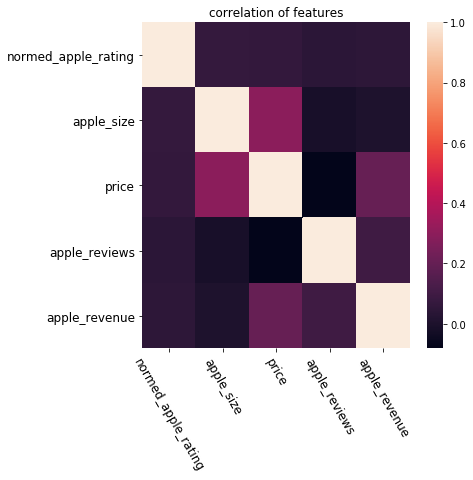

In [6]:
plt.figure(figsize=(6,6))
plt.title("correlation of features")
sns.heatmap(corr_df)
plt.xticks(rotation=(-60), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
corr_df = df[['normed_google_rating', 'google_size', 'price', 'google_reviews', 'google_revenue']].corr() 
corr_df["google_size"][['normed_google_rating', 'google_revenue', 'google_reviews']].sort_values(ascending=False)

google_reviews          0.315060
normed_google_rating    0.117309
google_revenue         -0.039029
Name: google_size, dtype: float64

In [8]:
corr_df["price"][['normed_google_rating', 'google_revenue', 'google_reviews']].sort_values(ascending=False)

google_revenue          0.194152
normed_google_rating    0.039737
google_reviews         -0.084497
Name: price, dtype: float64

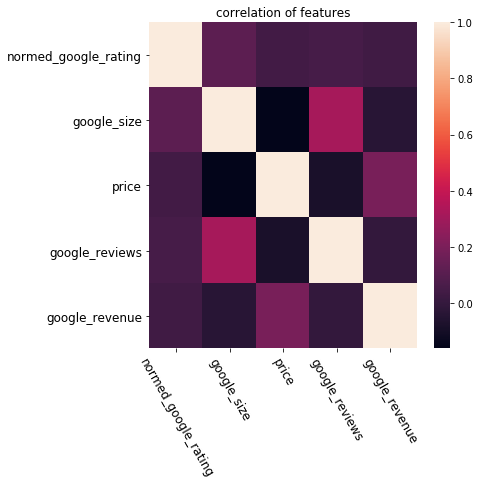

In [9]:
plt.figure(figsize=(6,6))
plt.title("correlation of features")
sns.heatmap(corr_df)
plt.xticks(rotation=(-60), fontsize=12)
plt.yticks(fontsize=12)
plt.show()